In [2]:
import os
import sys
import json
import numpy as np
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('ggplot')
import matplotlib.pyplot as plt
from pandeia.engine.perform_calculation import perform_calculation
from pandeia.engine.io_utils import read_json, write_json
from pandeia.engine.utils import merge_data
from astropy.io import fits
from astropy.table import Table
from copy import deepcopy

In [3]:
def strip_meta(d):
    if isinstance(d, dict):
        if 'meta' in d:
            meta_data = d.pop('meta')
        for k in d.keys():
            strip_meta(d[k])

In [4]:
%cd /Users/pickering/STScI/smite/pandeia_data/devtools/delivered

/Users/pickering/STScI/smite/pandeia_data/devtools/delivered


In [5]:
data = read_json("jwst_nircam_configuration.json")
strip_meta(data)
data

{}

In [6]:
data.keys()

dict_keys([])

In [7]:
for k, v in data.items():
    print(k)

In [8]:
os.environ['pandeia_refdata']

'/Users/pickering/STScI/smite/pandeia_data'

In [9]:
"september"[0:-1]

'septembe'

In [10]:
miri_filters = [
        "f1065c",
        "f1140c",
        "f1550c",
        "f2300c",
        "f560w",
        "f770w",
        "f1000w",
        "f1130w",
        "f1280w",
        "f1500w",
        "f1800w",
        "f2100w",
        "f2550w"
]
niriss_filters = [
        "f090w",
        "f115w",
        "f140m",
        "f150w",
        "f158m",
        "f200w",
        "f277w",
        "f356w",
        "f380m",
        "f430m",
        "f444w",
        "f480m"
    ]
nirspec_filters = [
        "f070lp",
        "f100lp",
        "f170lp",
        "f290lp",
        "f110w",
        "f140x",
        "clear"
    ]

In [11]:
filter_config = {}
for f in nirspec_filters:
    filter_config[f] = {}
    filter_config[f]["display_string"] = f.upper()

In [12]:
filter_config

{'clear': {'display_string': 'CLEAR'},
 'f070lp': {'display_string': 'F070LP'},
 'f100lp': {'display_string': 'F100LP'},
 'f110w': {'display_string': 'F110W'},
 'f140x': {'display_string': 'F140X'},
 'f170lp': {'display_string': 'F170LP'},
 'f290lp': {'display_string': 'F290LP'}}

In [13]:
write_json(filter_config, "blah.json")

In [15]:
filter_config.update?

In [19]:
for i in filter_config:
    print(i)

f070lp
f290lp
f100lp
f110w
f140x
clear
f170lp


# need to construct wavepix files for higher SOSS orders to properly construct detector plane

In [113]:
data = Table.read("../../jwst/niriss/wavepix/jwst_niriss_soss-256-ord1_trace.fits")
#old_data = Table.read("../../../master/pandeia_data/jwst/nircam/dispersion/jwst_nircam_disp_20151210124744.fits")
data2 = Table.read("../../jwst/niriss/wavepix/jwst_niriss_soss-96-ord1_trace.fits")
np.mean(data['TRACE'] - data2['TRACE'])

69.987534

In [116]:
ord2 = Table.read("../../jwst/niriss/wavepix/jwst_niriss_soss-256-ord2_trace.fits")
ord2['TRACE'] -= 70.0
ord2.write("../../jwst/niriss/wavepix/jwst_niriss_soss-96-ord2_trace.fits")

In [117]:
ord3 = Table.read("../../jwst/niriss/wavepix/jwst_niriss_soss-256-ord3_trace.fits")
ord3['TRACE'] -= 70.0
ord3.write("../../jwst/niriss/wavepix/jwst_niriss_soss-96-ord3_trace.fits")

<IPython.core.display.Javascript object>


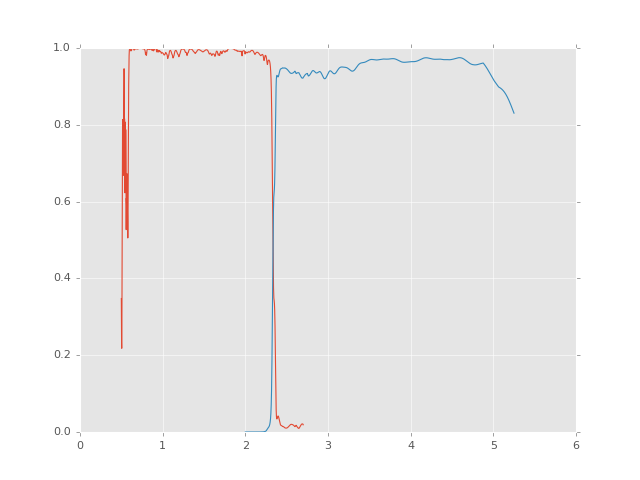

In [81]:
f = plt.figure()
plt.plot(data['WAVELENGTH'], data['THROUGHPUT'])
plt.plot(old_data['WAVELENGTH'], old_data['THROUGHPUT'])
plt.show()

In [60]:
data

wavelength,throughput
micron,
float32,float32
0.6,0.419734
0.61,0.469273
0.62,0.512626
0.63,0.550836
0.64,0.584114
0.65,0.616329
0.66,0.645068
0.67,0.666358


In [87]:
file = "/Users/pickering/STScI/smite/pandeia_test/tests/engine/jwst/instrument/nircam/defaults/sw_imaging/int.npz"
effdat = np.load(file)

<IPython.core.display.Javascript object>


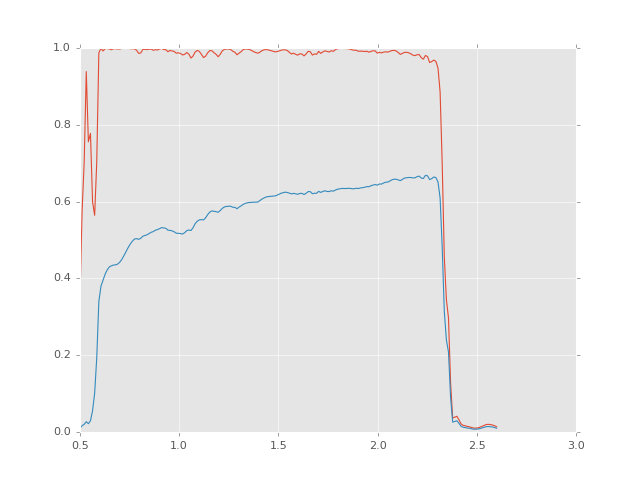

In [88]:
plt.figure()
plt.plot(effdat['arr_0'], effdat['arr_1'])
plt.plot(effdat['arr_0'], effdat['arr_2'])
#plt.plot(effdat['arr_0'], effdat['arr_3'])
#plt.plot(effdat['arr_0'], effdat['arr_4'])
plt.show()

In [84]:
fits.open("../../jwst/nircam/optical/jwst_nircam_lw_dbs.fits")[1].data

FITS_rec([(2.0, 1.93996e-05), (2.0009999999999999, 1.79938e-05),
       (2.0019999999999998, 1.6736500000000001e-05), ...,
       (5.2480000000000002, 0.83145697500000004),
       (5.2489999999999997, 0.83089695699999999),
       (5.25, 0.83033754400000004)], 
      dtype=(numpy.record, [('WAVELENGTH', '>f8'), ('THROUGHPUT', '>f8')]))

In [102]:
3 * 0.02186666666666667 * 256

16.7936

In [105]:
int(np.round(16.7936 / 0.02186666666666667 / 3))

256

In [118]:
filename = "jwst_miri_configuration_20160914154718.json"

In [136]:
import re, glob

In [137]:
n = re.compile(r"_\d{14}")

In [138]:
timestamp = n.search(filename).group(0)

In [139]:
f = filename.replace(timestamp, '')

In [140]:
f

'jwst_miri_configuration.json'

In [141]:
print(n.search(f))

None


In [142]:
for k, v in filter_config.items():
    print(k, v)

f070lp {'display_string': 'F070LP'}
f290lp {'display_string': 'F290LP'}
f100lp {'display_string': 'F100LP'}
f110w {'display_string': 'F110W'}
f140x {'display_string': 'F140X'}
clear {'display_string': 'CLEAR'}
f170lp {'display_string': 'F170LP'}


In [149]:
p, s = f.split('.')

In [150]:
p, s

('jwst_miri_configuration', 'json')

In [160]:
fileglob = "/grp/jwst/wit/refdata/pandeia/jwst_etc_prerelease_05/nircam/filters/jwst*.fits"
sorted(glob.glob(fileglob))

['/grp/jwst/wit/refdata/pandeia/jwst_etc_prerelease_05/nircam/filters/jwst_nircam_f070w_trans_20160902164019.fits',
 '/grp/jwst/wit/refdata/pandeia/jwst_etc_prerelease_05/nircam/filters/jwst_nircam_f090w_trans_20160902164019.fits',
 '/grp/jwst/wit/refdata/pandeia/jwst_etc_prerelease_05/nircam/filters/jwst_nircam_f115w_trans_20160902164019.fits',
 '/grp/jwst/wit/refdata/pandeia/jwst_etc_prerelease_05/nircam/filters/jwst_nircam_f140m_trans_20160902164019.fits',
 '/grp/jwst/wit/refdata/pandeia/jwst_etc_prerelease_05/nircam/filters/jwst_nircam_f150w2_trans_20160902164019.fits',
 '/grp/jwst/wit/refdata/pandeia/jwst_etc_prerelease_05/nircam/filters/jwst_nircam_f150w_trans_20160902164019.fits',
 '/grp/jwst/wit/refdata/pandeia/jwst_etc_prerelease_05/nircam/filters/jwst_nircam_f162m_trans_20160902164019.fits',
 '/grp/jwst/wit/refdata/pandeia/jwst_etc_prerelease_05/nircam/filters/jwst_nircam_f164n_trans_20160902164019.fits',
 '/grp/jwst/wit/refdata/pandeia/jwst_etc_prerelease_05/nircam/filters/j

In [154]:
glob.glob?

In [162]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'

    def disable(self):
        self.HEADER = ''
        self.OKBLUE = ''
        self.OKGREEN = ''
        self.WARNING = ''
        self.FAIL = ''
        self.ENDC = ''

In [163]:
bcolors.HEADER

'\x1b'

In [164]:
a

[1, 3, 2]

In [175]:
np.isnan([np.nan]).any()

True